# Clusterização utilizando KMeans - Python

### Utilizando bibliotecas padrão do python.

# Importando bibliotecas utilizadas para a análise

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

# Impotando o conjunto de dados

In [43]:
df_diabetes = pd.read_csv('diabetes.csv')


#Deletando a coluna "Classe"
df_noclass = df_diabetes.drop('Classe', axis=1)
df_noclass.head()

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Normalizando os valores entre 0 e 1

In [44]:
nomes = df_diabetes_noclass.columns
valores = df_diabetes_noclass.values
escala_min_max = preprocessing.MinMaxScaler()
valores_normalizados = escala_min_max.fit_transform(valores)
df_diabetes_normalizado = pd.DataFrame(valores_normalizados)
df_diabetes_normalizado.columns = nomes
df_diabetes_normalizado.head(5)

,Numero Gravida,Glicose,Pressao,Triceps,Insulina,Massa Corporal,Pedigree diabetes,Idade
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Implementando método Elbow

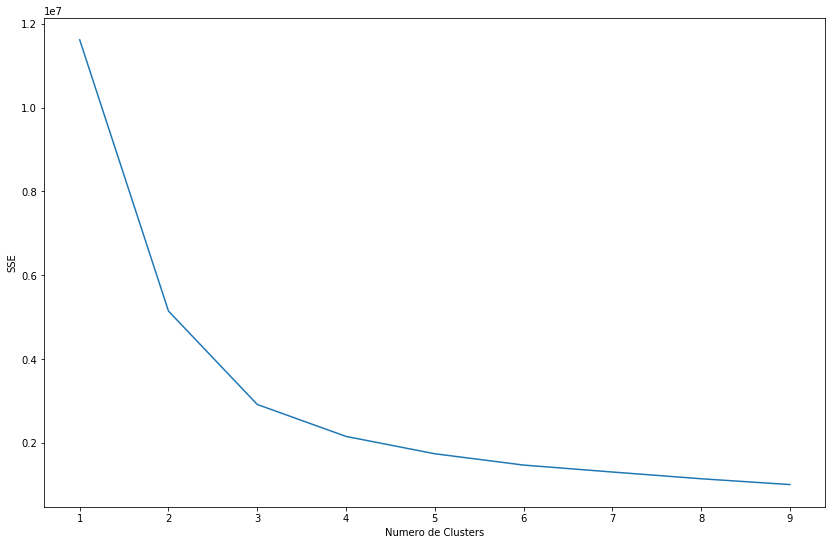

In [45]:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    df_diabetes_normalizado["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(14,9))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de Clusters")
plt.ylabel("SSE")
plt.show()

# Encontrando o valor ótimo de k

In [46]:
X = df_diabetes_normalizado
y = df_diabetes_normalizado

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("Para n_clusters={}, O Coeficiente de silueta é {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6322890478611892
For n_clusters=3, The Silhouette Coefficient is 0.6061753442711107
For n_clusters=4, The Silhouette Coefficient is 0.6290481274128917
For n_clusters=5, The Silhouette Coefficient is 0.5762271835759486
For n_clusters=6, The Silhouette Coefficient is 0.573134698782641
For n_clusters=7, The Silhouette Coefficient is 0.5665074790431633
For n_clusters=8, The Silhouette Coefficient is 0.5879181962357052
For n_clusters=9, The Silhouette Coefficient is 0.5027685740131101
For n_clusters=10, The Silhouette Coefficient is 0.46107542133928114
